In [2]:
import pandas as pd
import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib
from matplotlib import pyplot as plt


In [3]:
#Time Series
n = 10000
n_samples = np.linspace(0,n-1,n) 

white_noise = np.random.uniform(-0.9, 0.9, n) #uniform white noise with 10000 samples between -0.9 and 0.9
white_noise = np.arctanh(white_noise) #introduction of nonlinearity
x_input = lfilter([1, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0.5], 1, s_data) #filtered input time serie


In [7]:
s_data[0:10]

array([ 0.57285679, -0.35000267, -0.1870623 , -0.34463842,  0.16612469,
       -0.2469726 ,  0.88378044,  1.36341182, -0.56939559, -1.06997156])

In [4]:
#s_data_nl[0:10]

In [8]:
x_input[0:10]

array([ 0.57285679, -0.00628859, -0.3970639 , -0.4568758 , -0.04065836,
       -0.14729778,  0.73559688,  1.89368008,  0.2486515 , -1.41160892])

In [6]:
#x_input_nl[0:10]

array([-0.78539816, -1.25663706,  0.31415927,  1.09955743, -0.4712389 ,
        0.4712389 , -0.15707963, -1.41371669, -1.09955743, -1.41371669])

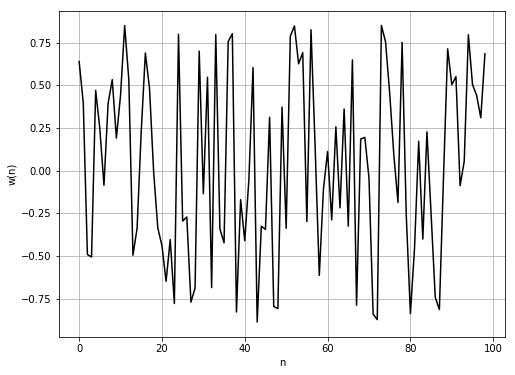

In [4]:
#White Noise Plot 
fig = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], white_noise[0:99], color='black')
plt.xlabel('n')
plt.ylabel('w(n)')

plt.grid()
plt.show()


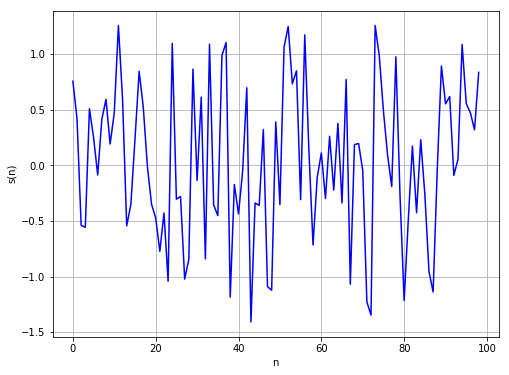

In [5]:
#Desired Time Serie Plot (White Noise between -1 and 1)
fig2 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], s_data[0:99], color='blue')
plt.xlabel('n')
plt.ylabel('s(n)')

plt.grid()
plt.show()

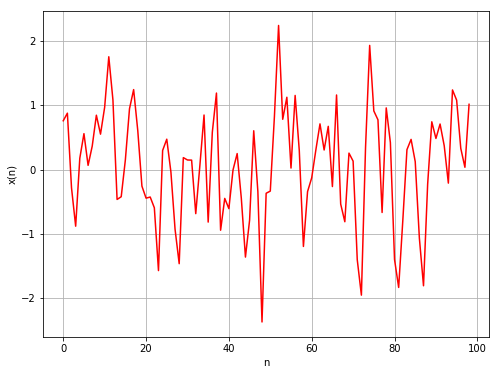

In [6]:
#Input Time Serie Plot (Filtered Time Serie)
fig3 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], x_input[0:99], color='red')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.grid()
plt.show()

In [7]:
#perceptron classico sinal

def perceptron(x_input, s_data, bias, lr):
    wind = 3
    winx = 2
    xm = np.zeros(winx)
    
    x_data = np.append(xm, x_input) 
    
    w = np.zeros(wind)
    w_temp = np.append(bias, w) #dim = 4
   
    y_out = []
   
    #for k in range (0, len(x_input)-1):
    for k in range (0, len(x_input)):
        
        w = w_temp #dim = 4
        
        x_temp = x_data[k:wind+k] #dim = 3
        x_temp2 = x_temp[::-1] #reverse x_temp
        x_temp3 = np.append(1, x_temp2) #dim = 4
        
        #y_temp is the dot product between w_temp and x_temp
        y_temp = np.tanh(np.dot(w,x_temp3)) #scalar value
        y_out.append(y_temp)
       
        if y_temp == s_data[k]: #if y_sample is equal to the desired sample, if the class is correct
            w_out = w
        else:
            w_out = w + lr*(s_data[k] - y_temp)*x_temp3
    
        w_temp = w_out
        
    return w_out, y_out

In [8]:
#perceptron modificado sinal

def PLR(s_data, x_input, lr):
    
    wind = 3
    winx = 2
    xm = np.zeros(winx) 
    x_data = np.append(xm, x_input)
 
    winy = 3
    y_input = np.zeros(winy)
    
    a = np.zeros(wind)
    b = np.zeros(wind)
   
    wtheta = np.append(a,b)
   
    for k in range(0,len(x_input)):
    #for k in range(0,len(x_input[winx:])-1):
        
        y_temp = y_input[k:wind+k]
        y = y_temp[::-1] #reverse y_temp
        
        x_temp = x_data[k:wind+k]
        x = x_temp[::-1] #reverse x_temp
      
        phi = np.append(y,x) #vector
        y_n = np.dot(wtheta, phi) #scalar, is the value of the n sample of the y signal
        
        error = s_data[k] - y_n  #scalar
        wtheta_out = wtheta + lr*phi*error #vector, weights update
    
        wtheta = wtheta_out
        y_input = np.append(y_input,y_n)
     
    
    y_out = y_input[winy:]

    
    return wtheta_out, y_out

In [9]:
#perceptron modificado não linearidade tanh sinal

def PLR_NL(s_data, x_input, lr):
    
    wind = 3
    winx = 2
    xm = np.zeros(winx) 
    x_data = np.append(xm, x_input)
 
    winy = 3
    y_input = np.zeros(winy)
    
    a = np.zeros(wind)
    b = np.zeros(wind)
   
    wtheta = np.append(a,b)
   
    for k in range(0,len(x_input)):
        y_temp = y_input[k:wind+k]
        y = y_temp[::-1] #reverse y_temp
        
        x_temp = x_data[k:wind+k]
        x = x_temp[::-1] #reverse x_temp
        
        phi = np.append(y,x)
        y_n = np.dot(wtheta, phi)
        y_nl = np.tanh(y_n) 
        
        error = s_data[k] - y_nl 
        wtheta_out = wtheta + lr*phi*error
    
        wtheta = wtheta_out
        y_input = np.append(y_input,y_nl)
    
    
    y_out = y_input[winy:]
    
    
    return wtheta_out, y_out

In [10]:
def EQM(s_data, y_data):
    
    esignal = []
    
    for k in range(0,len(y_data)):
        esample = (y_data[k] - s_data[k])**2
        esignal.append(esample)
    
    eqm_temp = np.sum(esignal)
    eqm = eqm_temp/len(y_data)


    return eqm

In [11]:
wtheta_plr, y_plr = PLR_NL(white_noise, x_input, 0.02)

In [12]:
eqm_plr = EQM(white_noise, y_plr)
eqm_plr

0.0733600692445201

In [13]:
wtheta_perceptron, y_perceptron = perceptron(x_input, white_noise, 0.5, 0.02)

In [14]:
eqm_perceptron = EQM(white_noise, y_perceptron)
eqm_perceptron

0.07639633664776084

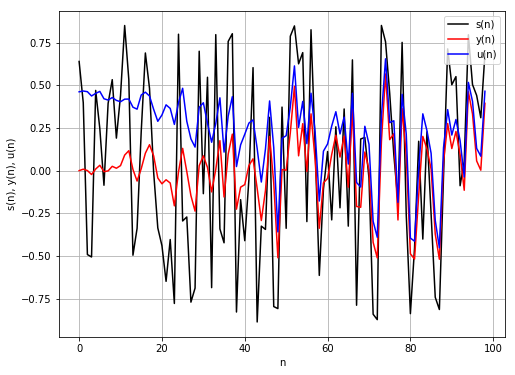

In [15]:
fig4 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()

plt.plot(n_samples[0:99], white_noise[0:99], color='black', label="s(n)")
plt.plot(n_samples[0:99], y_plr[0:99], color='red', label="y(n)")
plt.plot(n_samples[0:99], y_perceptron[0:99], color='blue', label="u(n)")

plt.xlabel('n')
plt.ylabel('s(n), y(n), u(n)')
plt.legend(loc='upper right')

plt.grid()
plt.show()